In [40]:
# Import packages and functions
import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

from pystac_client import Client
import planetary_computer

from IPython.display import Image

import rasterio
from rasterio.plot import show
import contextily as ctx

In [19]:
# Read in Phoenix subdivision shapefile
phoenix_subdivision = gpd.read_file("data/tl_2022_04_cousub/tl_2022_04_cousub.shp")

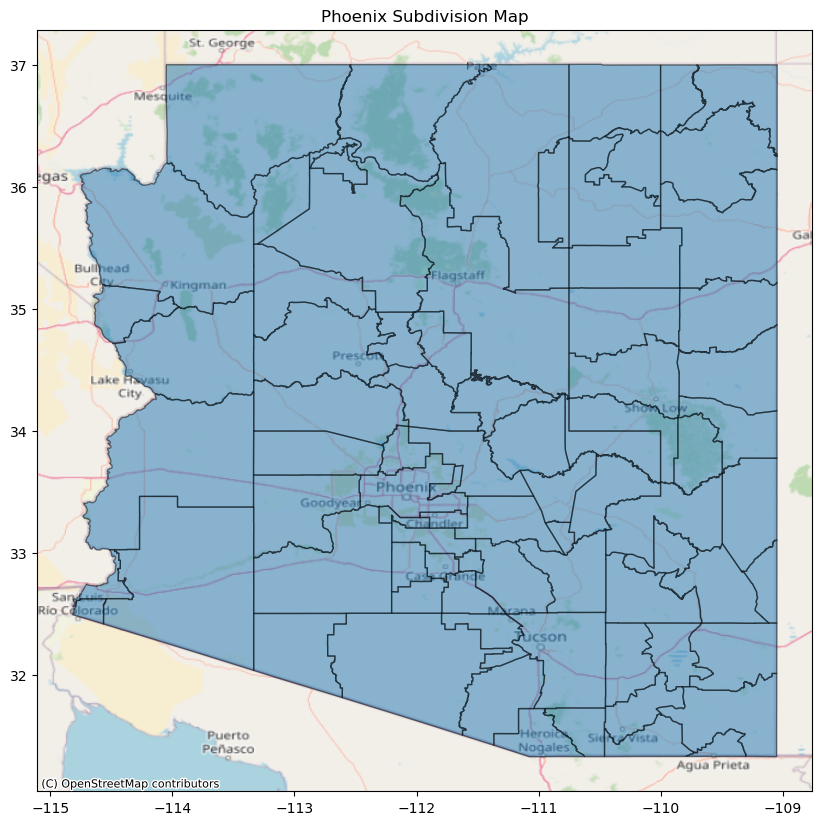

In [41]:
# Plotting the Phoenix subdivision
ax = phoenix_subdivision.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Adding basemap from OpenStreetMap using Contextily
ctx.add_basemap(ax, crs=phoenix_subdivision.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Adding title
plt.title("Phoenix Subdivision Map")

# Display the map
plt.show()

In [2]:
# Access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [33]:
# Temporal range of interest
time_range = "2017-01-01/2020-01-01"

# Phoenix bounding box
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# Catalog search
search = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_range)

# Get items from search
items = search.item_collection()
print(f'There are {len(items)} items in the search.')
items

There are 4 items in the search.


In [38]:
item_2020 = items[0]
bii_2020 = rioxr.open_rasterio(item_2020.assets['data'].href)
bii_2020

<xarray.DataArray (band: 1, y: 7992, x: 7992)>
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0